11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step

Training Autoencoder with latent dimension: 16
Epoch 1/20
235/235 - 5s - 22ms/step - loss: 0.3052 - val_loss: 0.2206
Epoch 2/20
235/235 - 3s - 12ms/step - loss: 0.1992 - val_loss: 0.1810
Epoch 3/20
235/235 - 5s - 22ms/step - loss: 0.1718 - val_loss: 0.1612
Epoch 4/20
235/235 - 4s - 19ms/step - loss: 0.1568 - val_loss: 0.1506
Epoch 5/20
235/235 - 3s - 11ms/step - loss: 0.1492 - val_loss: 0.1452
Epoch 6/20
235/235 - 3s - 11ms/step - loss: 0.1450 - val_loss: 0.1418
Epoch 7/20
235/235 - 3s - 13ms/step - loss: 0.1421 - val_loss: 0.1395
Epoch 8/20
235/235 - 3s - 11ms/step - loss: 0.1398 - val_loss: 0.1372
Epoch 9/20
235/235 - 2s - 9ms/step - loss: 0.1378 - val_loss: 0.1353
Epoch 10/20
235/235 - 2s - 8ms/step - loss: 0.1361 - val_loss: 0.1337
Epoch 11/20
235/235 - 3s - 11ms/step - loss: 0.1345 - val_loss: 0.1322
Epoch 12/20
235/235 - 3s - 11ms/step - loss: 0.1332 - val_loss: 0.1310
Epoch 13/20
235/235 - 3s - 13ms/step - loss: 0.1321 - val_lo

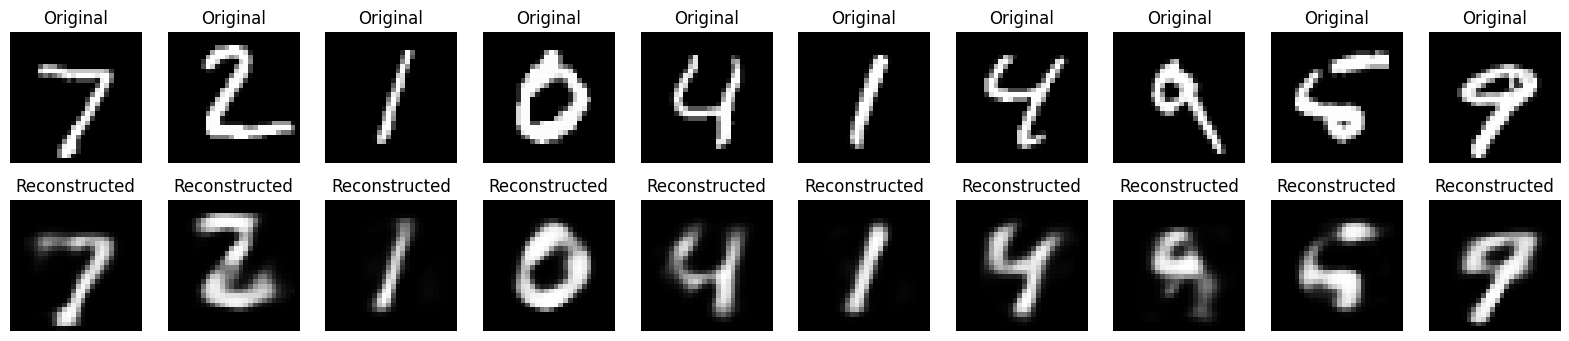


Training Autoencoder with latent dimension: 32
Epoch 1/20
235/235 - 5s - 19ms/step - loss: 0.2759 - val_loss: 0.1911
Epoch 2/20
235/235 - 4s - 16ms/step - loss: 0.1712 - val_loss: 0.1533
Epoch 3/20
235/235 - 2s - 9ms/step - loss: 0.1445 - val_loss: 0.1341
Epoch 4/20
235/235 - 3s - 11ms/step - loss: 0.1289 - val_loss: 0.1217
Epoch 5/20
235/235 - 4s - 15ms/step - loss: 0.1188 - val_loss: 0.1137
Epoch 6/20
235/235 - 4s - 17ms/step - loss: 0.1123 - val_loss: 0.1085
Epoch 7/20
235/235 - 3s - 11ms/step - loss: 0.1076 - val_loss: 0.1045
Epoch 8/20
235/235 - 3s - 12ms/step - loss: 0.1039 - val_loss: 0.1011
Epoch 9/20
235/235 - 5s - 21ms/step - loss: 0.1009 - val_loss: 0.0984
Epoch 10/20
235/235 - 2s - 10ms/step - loss: 0.0985 - val_loss: 0.0964
Epoch 11/20
235/235 - 2s - 10ms/step - loss: 0.0969 - val_loss: 0.0950
Epoch 12/20
235/235 - 2s - 10ms/step - loss: 0.0958 - val_loss: 0.0942
Epoch 13/20
235/235 - 3s - 14ms/step - loss: 0.0951 - val_loss: 0.0936
Epoch 14/20
235/235 - 4s - 18ms/step - 

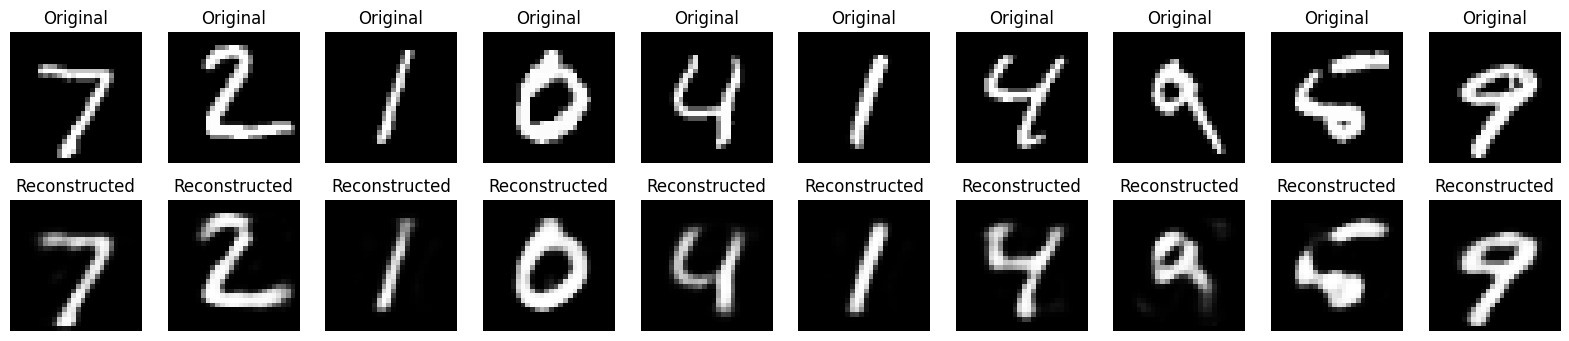


Training Autoencoder with latent dimension: 64
Epoch 1/20
235/235 - 4s - 16ms/step - loss: 0.2471 - val_loss: 0.1626
Epoch 2/20
235/235 - 5s - 21ms/step - loss: 0.1441 - val_loss: 0.1270
Epoch 3/20
235/235 - 3s - 12ms/step - loss: 0.1179 - val_loss: 0.1080
Epoch 4/20
235/235 - 5s - 20ms/step - loss: 0.1034 - val_loss: 0.0968
Epoch 5/20
235/235 - 3s - 11ms/step - loss: 0.0941 - val_loss: 0.0894
Epoch 6/20
235/235 - 3s - 11ms/step - loss: 0.0878 - val_loss: 0.0845
Epoch 7/20
235/235 - 3s - 15ms/step - loss: 0.0836 - val_loss: 0.0812
Epoch 8/20
235/235 - 4s - 18ms/step - loss: 0.0808 - val_loss: 0.0788
Epoch 9/20
235/235 - 2s - 10ms/step - loss: 0.0788 - val_loss: 0.0773
Epoch 10/20
235/235 - 3s - 11ms/step - loss: 0.0775 - val_loss: 0.0762
Epoch 11/20
235/235 - 4s - 15ms/step - loss: 0.0765 - val_loss: 0.0754
Epoch 12/20
235/235 - 4s - 17ms/step - loss: 0.0758 - val_loss: 0.0748
Epoch 13/20
235/235 - 3s - 11ms/step - loss: 0.0753 - val_loss: 0.0744
Epoch 14/20
235/235 - 3s - 11ms/step -

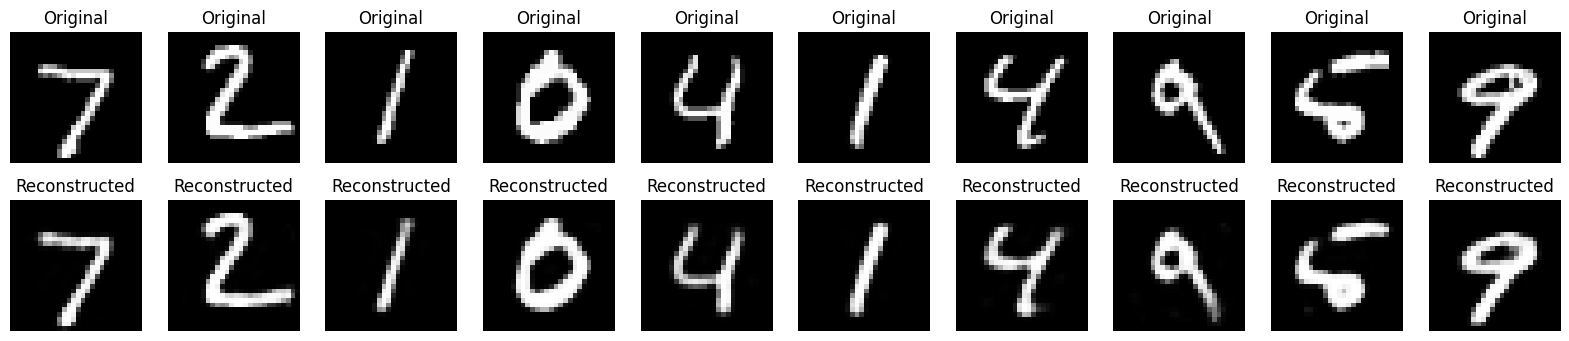

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy

# 1. Load the MNIST dataset
(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype("float32") / 255.
x_test = x_test.astype("float32") / 255.
x_train = x_train.reshape((len(x_train), -1))  # Flatten to (num_samples, 784)
x_test = x_test.reshape((len(x_test), -1))

# Function to create autoencoder
def build_autoencoder(latent_dim):
    input_img = Input(shape=(784,))
    # Encoder
    encoded = Dense(latent_dim, activation='relu')(input_img)
    # Decoder
    decoded = Dense(784, activation='sigmoid')(encoded)

    # Autoencoder model
    autoencoder = Model(input_img, decoded)

    return autoencoder

# 3. Compile and train
def train_autoencoder(latent_dim, epochs=20):
    autoencoder = build_autoencoder(latent_dim)
    autoencoder.compile(optimizer=Adam(), loss=BinaryCrossentropy())
    autoencoder.fit(x_train, x_train,
                    epochs=epochs,
                    batch_size=256,
                    shuffle=True,
                    validation_data=(x_test, x_test),
                    verbose=2)
    return autoencoder

# 4. Plot original vs reconstructed images
def plot_reconstructions(model, x_test, num_images=10):
    decoded_imgs = model.predict(x_test)
    plt.figure(figsize=(20, 4))
    for i in range(num_images):
        # Original
        ax = plt.subplot(2, num_images, i + 1)
        plt.imshow(x_test[i].reshape(28, 28), cmap="gray")
        plt.title("Original")
        plt.axis("off")

        # Reconstruction
        ax = plt.subplot(2, num_images, i + 1 + num_images)
        plt.imshow(decoded_imgs[i].reshape(28, 28), cmap="gray")
        plt.title("Reconstructed")
        plt.axis("off")
    plt.show()

# 5. Experiment with different latent dimensions
for latent_dim in [16, 32, 64]:
    print(f"\nTraining Autoencoder with latent dimension: {latent_dim}")
    autoencoder = train_autoencoder(latent_dim)
    plot_reconstructions(autoencoder, x_test)


Epoch 1/20
235/235 - 4s - 18ms/step - loss: 0.2868 - val_loss: 0.2178
Epoch 2/20
235/235 - 5s - 22ms/step - loss: 0.1986 - val_loss: 0.1827
Epoch 3/20
235/235 - 6s - 24ms/step - loss: 0.1758 - val_loss: 0.1664
Epoch 4/20
235/235 - 4s - 16ms/step - loss: 0.1617 - val_loss: 0.1549
Epoch 5/20
235/235 - 3s - 11ms/step - loss: 0.1518 - val_loss: 0.1467
Epoch 6/20
235/235 - 2s - 10ms/step - loss: 0.1451 - val_loss: 0.1414
Epoch 7/20
235/235 - 3s - 13ms/step - loss: 0.1399 - val_loss: 0.1355
Epoch 8/20
235/235 - 5s - 19ms/step - loss: 0.1352 - val_loss: 0.1327
Epoch 9/20
235/235 - 3s - 11ms/step - loss: 0.1330 - val_loss: 0.1312
Epoch 10/20
235/235 - 3s - 11ms/step - loss: 0.1317 - val_loss: 0.1302
Epoch 11/20
235/235 - 3s - 14ms/step - loss: 0.1309 - val_loss: 0.1296
Epoch 12/20
235/235 - 4s - 18ms/step - loss: 0.1305 - val_loss: 0.1293
Epoch 13/20
235/235 - 3s - 11ms/step - loss: 0.1301 - val_loss: 0.1291
Epoch 14/20
235/235 - 2s - 9ms/step - loss: 0.1299 - val_loss: 0.1287
Epoch 15/20
235/

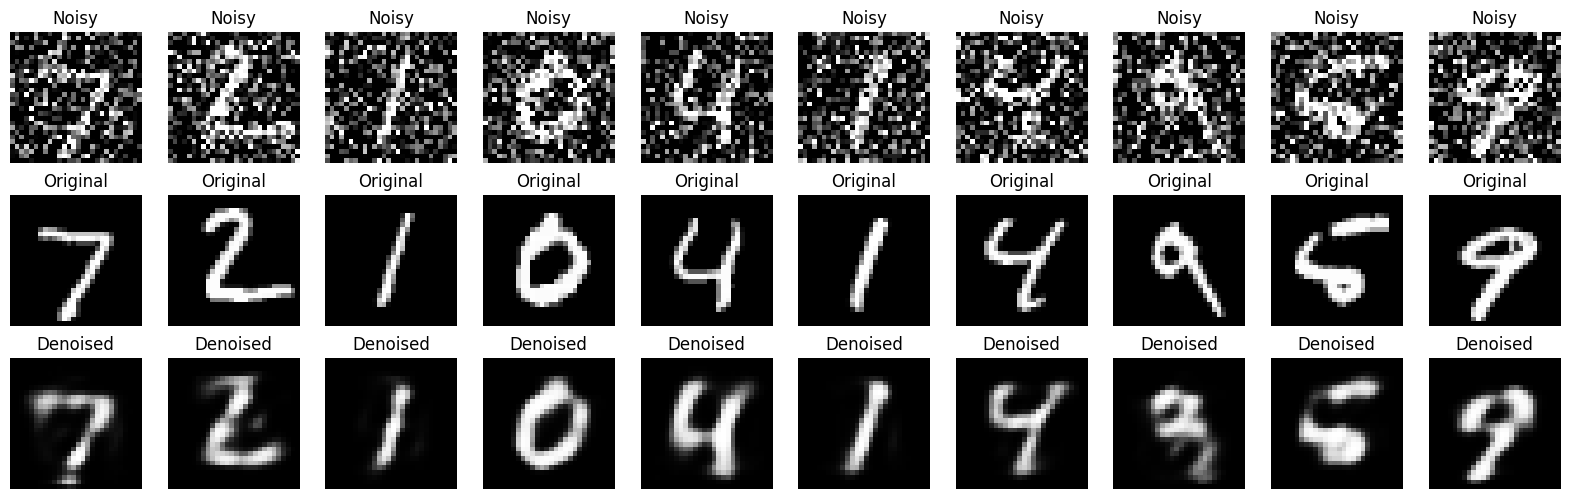

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy

# Load and normalize MNIST
(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype("float32") / 255.
x_test = x_test.astype("float32") / 255.
x_train = x_train.reshape((len(x_train), -1))  # (60000, 784)
x_test = x_test.reshape((len(x_test), -1))     # (10000, 784)

# Add Gaussian noise
def add_noise(data, mean=0.0, std=0.5):
    noise = np.random.normal(mean, std, data.shape)
    noisy_data = data + noise
    noisy_data = np.clip(noisy_data, 0., 1.)
    return noisy_data

x_train_noisy = add_noise(x_train)
x_test_noisy = add_noise(x_test)

# Build autoencoder
def build_autoencoder(latent_dim):
    input_img = Input(shape=(784,))
    encoded = Dense(latent_dim, activation='relu')(input_img)
    decoded = Dense(784, activation='sigmoid')(encoded)
    return Model(input_img, decoded)

# Train function
def train_denoising_autoencoder(latent_dim=32, epochs=20):
    autoencoder = build_autoencoder(latent_dim)
    autoencoder.compile(optimizer=Adam(), loss=BinaryCrossentropy())
    autoencoder.fit(x_train_noisy, x_train,  # input: noisy, output: clean
                    epochs=epochs,
                    batch_size=256,
                    shuffle=True,
                    validation_data=(x_test_noisy, x_test),
                    verbose=2)
    return autoencoder

# Visualization
def plot_denoising(autoencoder, x_test_noisy, x_test, num_images=10):
    decoded_imgs = autoencoder.predict(x_test_noisy)
    plt.figure(figsize=(20, 6))
    for i in range(num_images):
        # Noisy input
        ax = plt.subplot(3, num_images, i + 1)
        plt.imshow(x_test_noisy[i].reshape(28, 28), cmap="gray")
        plt.title("Noisy")
        plt.axis("off")
        # Clean ground truth
        ax = plt.subplot(3, num_images, i + 1 + num_images)
        plt.imshow(x_test[i].reshape(28, 28), cmap="gray")
        plt.title("Original")
        plt.axis("off")
        # Reconstructed
        ax = plt.subplot(3, num_images, i + 1 + 2 * num_images)
        plt.imshow(decoded_imgs[i].reshape(28, 28), cmap="gray")
        plt.title("Denoised")
        plt.axis("off")
    plt.show()

# Train and visualize
autoencoder = train_denoising_autoencoder(latent_dim=32)
plot_denoising(autoencoder, x_test_noisy, x_test)


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

# 1. Load text dataset
path = tf.keras.utils.get_file('shakespeare.txt',
    'https://storage.googleapis.com/download.tensorflow.org/data/shakespeare.txt')
with open(path, 'r', encoding='utf-8') as f:
    text = f.read().lower()

print(f"Corpus length: {len(text)}")

# 2. Preprocess: Create char -> index mappings
chars = sorted(set(text))
char2idx = {c: i for i, c in enumerate(chars)}
idx2char = np.array(chars)

vocab_size = len(chars)
print(f"Unique characters: {vocab_size}")

# Convert all text to integer indices
text_as_int = np.array([char2idx[c] for c in text])

# Create sequences of input and target characters
seq_length = 100
step = 1
input_seqs = []
target_chars = []

for i in range(0, len(text_as_int) - seq_length, step):
    input_seqs.append(text_as_int[i:i + seq_length])
    target_chars.append(text_as_int[i + seq_length])

x = np.array(input_seqs)
y = np.array(target_chars)

# One-hot encode y (optional, Dense layer with softmax will handle this)
y = tf.keras.utils.to_categorical(y, num_classes=vocab_size)

# 3. Build the model
model = Sequential([
    LSTM(128, input_shape=(seq_length, vocab_size)),
    Dense(vocab_size, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy')
model.summary()

# 4. Prepare inputs (one-hot encode x)
x_onehot = tf.keras.utils.to_categorical(x, num_classes=vocab_size)

# Train
model.fit(x_onehot, y, batch_size=128, epochs=10)

# 5. Text generation with temperature scaling
def sample(preds, temperature=1.0):
    preds = np.asarray(preds).astype('float64')
    preds = np.log(preds + 1e-8) / temperature  # temperature scaling
    exp_preds = np.exp(preds)
    preds = exp_preds / np.sum(exp_preds)
    return np.random.choice(len(preds), p=preds)

def generate_text(model, seed_text, length=300, temperature=1.0):
    generated = seed_text
    input_seq = [char2idx[c] for c in seed_text.lower()]

    for _ in range(length):
        input_arr = tf.keras.utils.to_categorical([input_seq[-seq_length:]], num_classes=vocab_size)
        preds = model.predict(input_arr, verbose=0)[0]
        next_index = sample(preds, temperature)
        next_char = idx2char[next_index]
        generated += next_char
        input_seq.append(next_index)

    return generated

# Try generating text with different temperatures
seed = "To be, or not to be, that is the question:"
print("\n-- Temperature = 0.2 --")
print(generate_text(model, seed, temperature=0.2))

print("\n-- Temperature = 1.0 --")
print(generate_text(model, seed, temperature=1.0))

print("\n-- Temperature = 1.5 --")
print(generate_text(model, seed, temperature=1.5))


1115394/1115394 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Corpus length: 1115394
Unique characters: 39


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 128)                 │          86,016 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 39)                  │           5,031 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 91,047 (355.65 KB)

 Trainable params: 91,047 (355.65 KB)

 Non-trainable params: 0 (0.00 B)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/3
157/157 - 82s - 520ms/step - accuracy: 0.7526 - loss: 0.5069 - val_accuracy: 0.8314 - val_loss: 0.3825
Epoch 2/3
157/157 - 83s - 529ms/step - accuracy: 0.8599 - loss: 0.3404 - val_accuracy: 0.8290 - val_loss: 0.3810
Epoch 3/3
157/157 - 76s - 482ms/step - accuracy: 0.8557 - loss: 0.3445 - val_accuracy: 0.8344 - val_loss: 0.3964
782/782 ━━━━━━━━━━━━━━━━━━━━ 40s 51ms/step


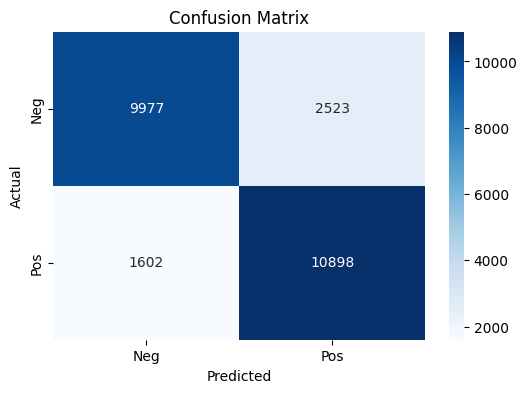

Classification Report:
               precision    recall  f1-score   support

           0     0.8616    0.7982    0.8287     12500
           1     0.8120    0.8718    0.8409     12500

    accuracy                         0.8350     25000
   macro avg     0.8368    0.8350    0.8348     25000
weighted avg     0.8368    0.8350    0.8348     25000



In [1]:
import numpy as np
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load IMDB dataset (only top 10,000 words)
vocab_size = 10000
maxlen = 200

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=vocab_size)

# 2. Preprocess: Pad sequences
x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)

# 3. Build LSTM-based model
model = Sequential([
    Embedding(vocab_size, 128, input_length=maxlen),
    LSTM(64, dropout=0.2, recurrent_dropout=0.2),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

# Train the model
model.fit(x_train, y_train,
          batch_size=128,
          epochs=3,
          validation_split=0.2,
          verbose=2)

# 4. Evaluate model
y_pred_probs = model.predict(x_test)
y_pred = (y_pred_probs > 0.5).astype(int)

# Confusion matrix and classification report
cm = confusion_matrix(y_test, y_pred)
cr = classification_report(y_test, y_pred, digits=4)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Neg", "Pos"], yticklabels=["Neg", "Pos"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Print classification report
print("Classification Report:\n", cr)
